In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('./sf-crime/train.csv')
test = pd.read_csv('./sf-crime/test.csv')
submission = pd.read_csv('./sf-crime/sampleSubmission.csv')
train.shape, test.shape, submission.shape

((878049, 9), (884262, 7), (884262, 40))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   Dates       884262 non-null  object 
 2   DayOfWeek   884262 non-null  object 
 3   PdDistrict  884262 non-null  object 
 4   Address     884262 non-null  object 
 5   X           884262 non-null  float64
 6   Y           884262 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


In [6]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [102]:
train.groupby('Category')['Descript'].value_counts().to_frame()

Descript
Category    Descript                                                    
ARSON       ARSON OF A VEHICLE                                       607
            ARSON                                                    447
            ARSON OF AN INHABITED DWELLING                           217
            ATTEMPTED ARSON                                          109
            ARSON OF A COMMERCIAL BUILDING                            65
...                                                                  ...
WEAPON LAWS POSS OF FIREARM SILENCER                                   3
            WEAPON, ASSAULT, REGISTRATION OR TRANSFER VIOLA...         3
            ARMOR PENETRATING AMMUNITION, POSSESSION                   2
            DESTRUCTIVE DEVICE, POSSESSION OF MATERIALS                1
            SNIPER SCOPE, POSSESSION OF                                1

[887 rows x 1 columns]

In [36]:
train['Resolution'].value_counts()

NONE                                      526790
ARREST, BOOKED                            206403
ARREST, CITED                              77004
LOCATED                                    17101
PSYCHOPATHIC CASE                          14534
UNFOUNDED                                   9585
JUVENILE BOOKED                             5564
COMPLAINANT REFUSES TO PROSECUTE            3976
DISTRICT ATTORNEY REFUSES TO PROSECUTE      3934
NOT PROSECUTED                              3714
JUVENILE CITED                              3332
PROSECUTED BY OUTSIDE AGENCY                2504
EXCEPTIONAL CLEARANCE                       1530
JUVENILE ADMONISHED                         1455
JUVENILE DIVERTED                            355
CLEARED-CONTACT JUVENILE FOR MORE INFO       217
PROSECUTED FOR LESSER OFFENSE                 51
Name: Resolution, dtype: int64

In [146]:
li = list(train['Category'].value_counts().index)
li[4], li[5], li[7], li[8]
li[1], li[10], li[30], li[38]
li[2], li[3], li[6], li[9]

('NON-CRIMINAL', 'ASSAULT', 'VANDALISM', 'SUSPICIOUS OCC')

In [38]:
train['PdDistrict'].value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [18]:
train[['X','Y']].describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [89]:
check['DayOfWeek'].unique()

array(['Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday',
       'Thursday'], dtype=object)

In [95]:
from datetime import datetime
check = train.copy()
check = check[check['Y']<=50]
check['Dates'] = pd.to_datetime(check['Dates'])
check['year'] = check['Dates'].apply(lambda x: x.year)
check['DayOfWeek'].replace(['Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday','Thursday'], 
                           [3,2,1,7,6,5,4], inplace=True)

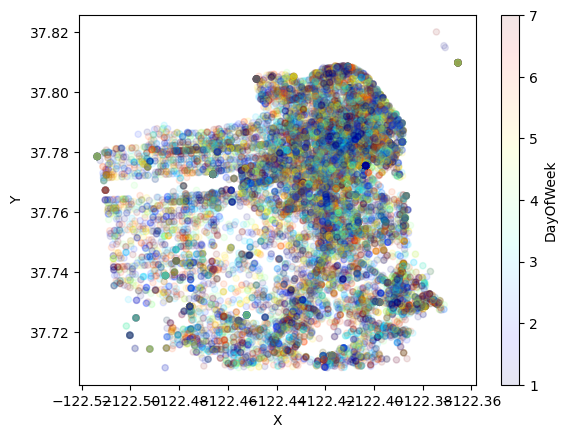

In [96]:
check[check['year']==2015][:].plot(kind='scatter', x='X', y='Y', alpha=0.1,
                                  c='DayOfWeek', cmap=plt.get_cmap('jet'), colorbar=True)
plt.show()

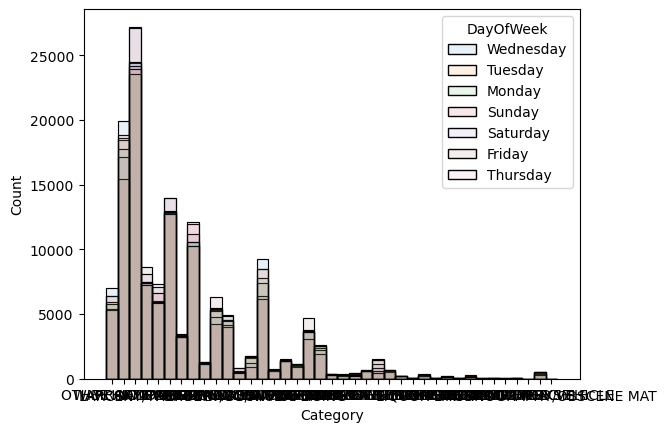

In [53]:
# data = check[check['Category'] in ('ARSON','ASSAULT')][list.train.columns]
sns.histplot(data=train, x='Category', hue='DayOfWeek', alpha=0.1)
plt.show()

In [103]:
crosstab1 = pd.crosstab(train['Category'], train['DayOfWeek'])
crosstab1.reset_index(inplace=True)
type(crosstab1)

pandas.core.frame.DataFrame

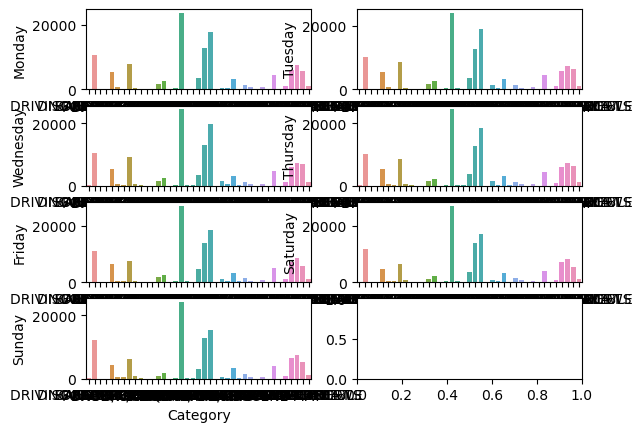

In [113]:
weekday_li = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, ax = plt.subplots(4,2)
ax = ax.flatten()
for i, week in enumerate(weekday_li):
    sns.barplot(data=crosstab1, x='Category', y=week, ax=ax[i])
plt.show()

In [140]:
wc = train['DayOfWeek'].value_counts().to_frame() # weekcount
평일평균 = (wc.loc['Monday'] + wc.loc['Tuesday'] + wc.loc['Wednesday'] + wc.loc['Thursday'])/4
주말평균 = (wc.loc['Friday'] + wc.loc['Saturday'] + wc.loc['Sunday'])/3
print('평일평균:',float(평일평균), '/ 주말평균:',float(주말평균))

평일평균: 125199.5 / 주말평균: 125750.33333333333


In [117]:
crosstab1.style.background_gradient(cmap='Blues')

DayOfWeek,Category,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,ARSON,220,228,220,211,199,235,200
1,ASSAULT,11160,10560,11995,12082,10246,10280,10553
2,BAD CHECKS,62,66,45,20,66,76,71
3,BRIBERY,49,41,42,41,39,37,40
4,BURGLARY,6327,5262,4754,4231,5350,5374,5457
5,DISORDERLY CONDUCT,541,608,624,586,644,657,660
6,DRIVING UNDER THE INFLUENCE,352,263,457,442,282,251,221
7,DRUG/NARCOTIC,7420,7823,6390,6143,8454,8474,9267
8,DRUNKENNESS,622,513,833,813,496,461,542
9,EMBEZZLEMENT,211,222,137,108,165,156,167


In [41]:
pd.crosstab(train['Category'], train['PdDistrict']).style.background_gradient(cmap='Blues')

PdDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Category,,,,,,,,,,
ARSON,393,111,182,145,149,65,103,185,120,60
ASSAULT,9857,6977,8533,11149,8318,3515,3202,12183,5463,7679
BAD CHECKS,34,65,32,46,54,15,31,74,36,19
BRIBERY,56,12,53,66,18,7,8,37,17,15
BURGLARY,3930,4519,3331,3745,5854,2888,2696,4841,3463,1488
DISORDERLY CONDUCT,219,494,171,1099,452,271,108,511,162,833
DRIVING UNDER THE INFLUENCE,179,160,206,357,260,176,319,306,202,103
DRUG/NARCOTIC,4498,1805,2373,8757,4511,2573,999,9228,1531,17696
DRUNKENNESS,243,517,190,782,368,374,149,959,259,439


In [194]:
cat_li = ['NON-CRIMINAL', 'ASSAULT', 'VANDALISM', 'SUSPICIOUS OCC']
weekday_li = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
check['hour'] = check['Dates'].apply(lambda x: x.hour)
check['month']= check['Dates'].apply(lambda x: x.month)

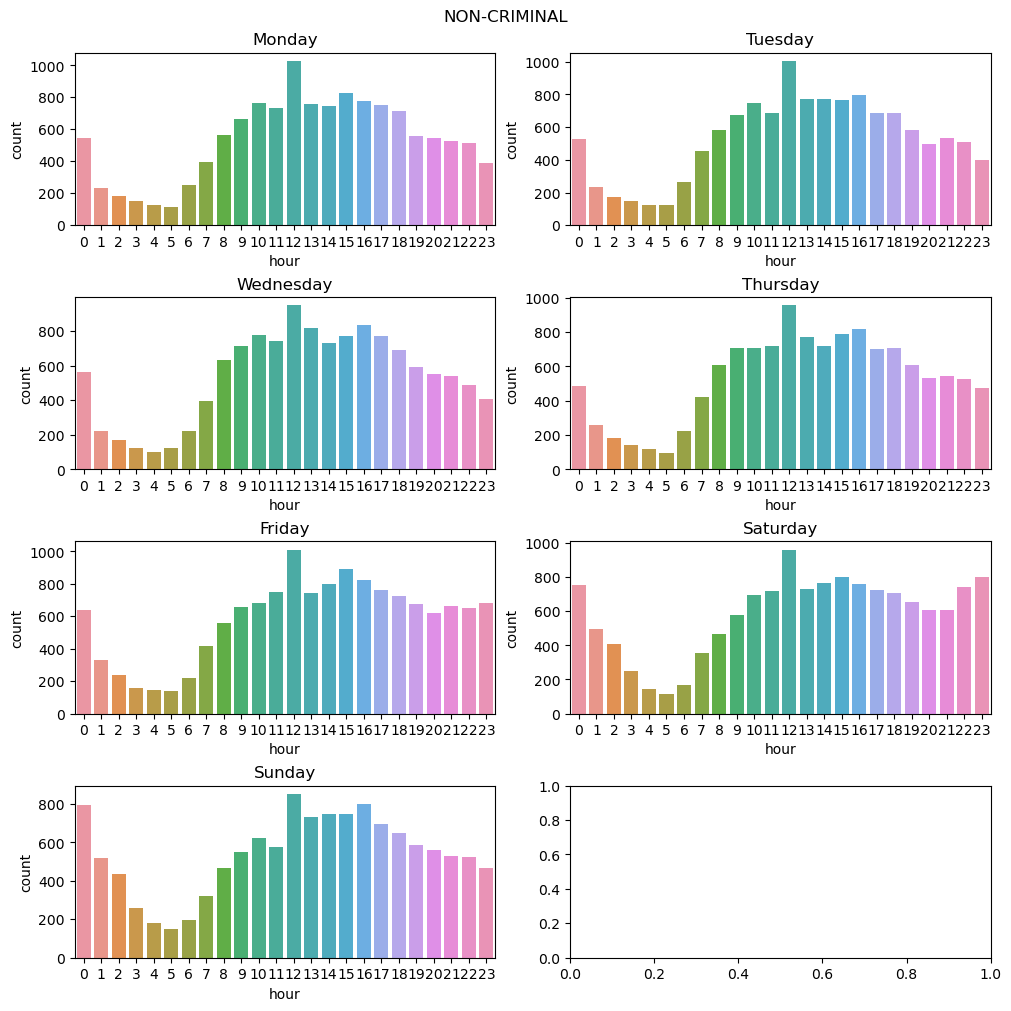

In [190]:
flag = 0 # 'NON-CRIMINAL'
fig, ax = plt.subplots(4,2, constrained_layout=True, figsize=(10,10))
ax = ax.flatten()

for i in range(len(weekday_li)):
    data = check[(check['Category']==cat_li[flag])&(check['DayOfWeek']==i+1)][:]
    sns.countplot(data=data, x='hour', ax=ax[i])
    ax[i].set_title(weekday_li[i])
fig.suptitle(cat_li[flag])
plt.show()

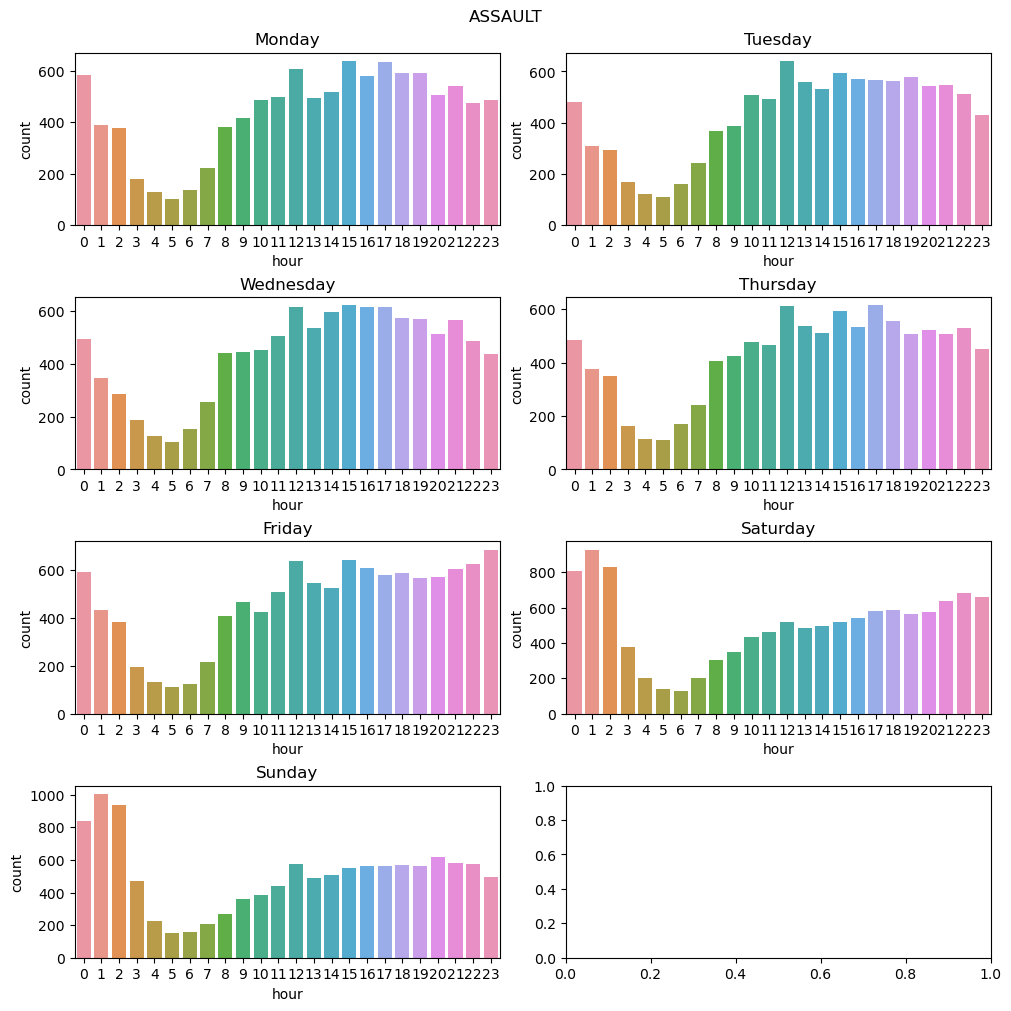

In [191]:
flag = 1 # 'ASSAULT'
fig, ax = plt.subplots(4,2, constrained_layout=True, figsize=(10,10))
ax = ax.flatten()

for i in range(len(weekday_li)):
    data = check[(check['Category']==cat_li[flag])&(check['DayOfWeek']==i+1)][:]
    sns.countplot(data=data, x='hour', ax=ax[i])
    ax[i].set_title(weekday_li[i])
fig.suptitle(cat_li[flag])
plt.show()

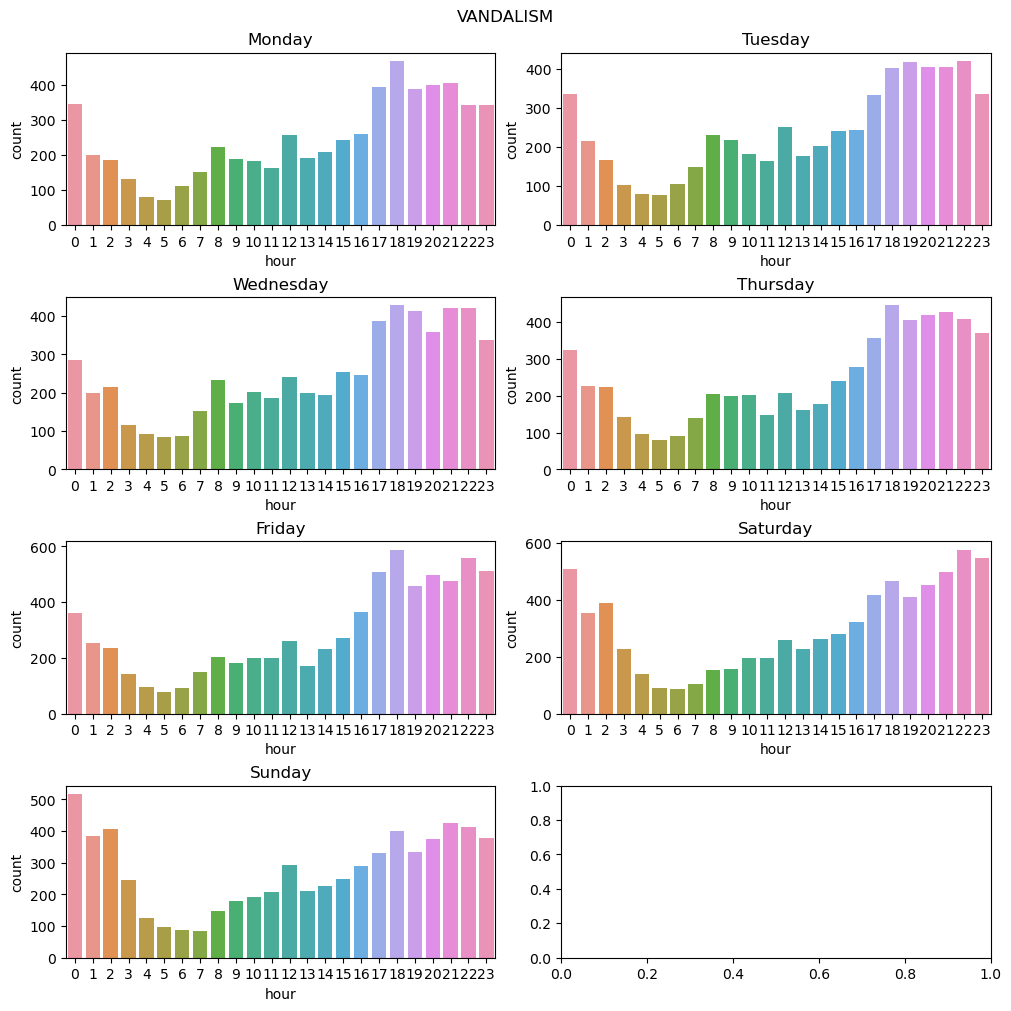

In [192]:
flag = 2 # 'VANDALISM'
fig, ax = plt.subplots(4,2, constrained_layout=True, figsize=(10,10))
ax = ax.flatten()

for i in range(len(weekday_li)):
    data = check[(check['Category']==cat_li[flag])&(check['DayOfWeek']==i+1)][:]
    sns.countplot(data=data, x='hour', ax=ax[i])
    ax[i].set_title(weekday_li[i])
fig.suptitle(cat_li[flag])
plt.show()

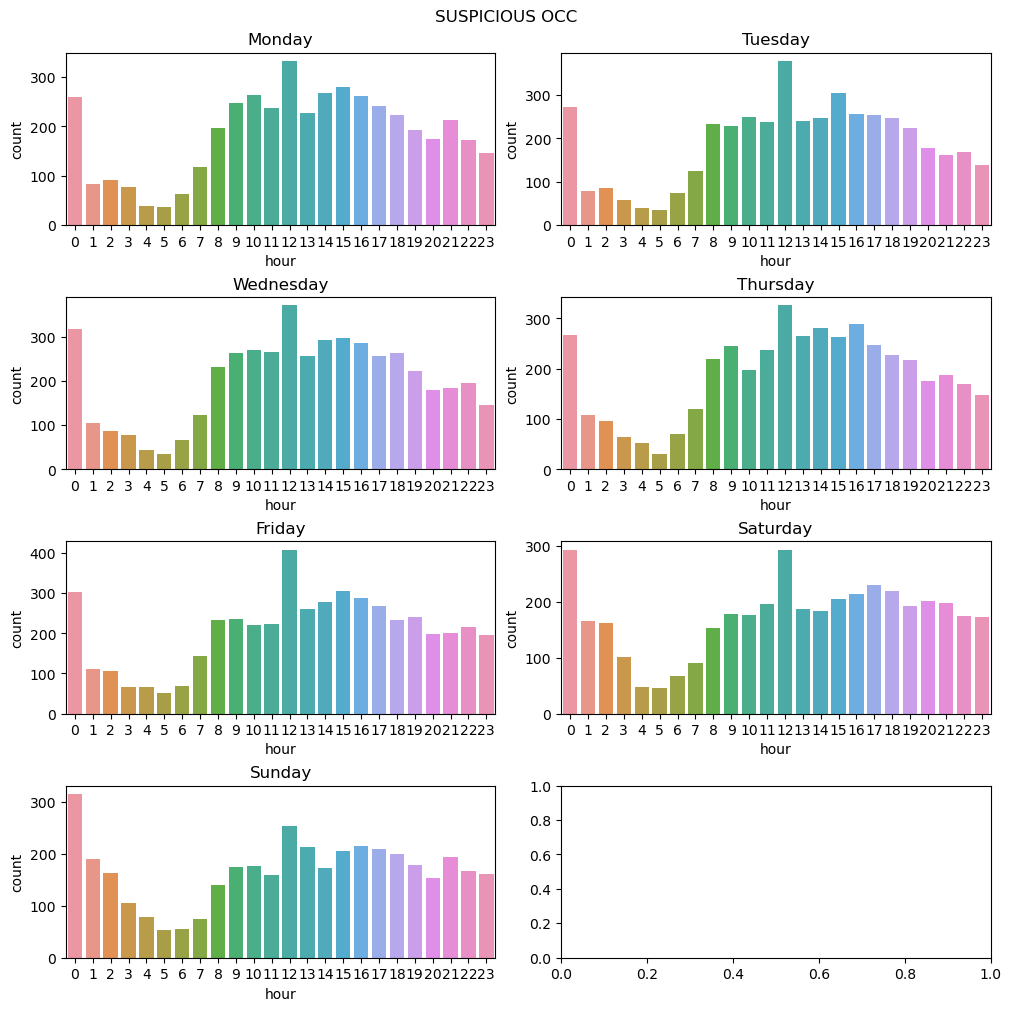

In [193]:
flag = 3 # 'SUSPICIOUS OCC'
fig, ax = plt.subplots(4,2, constrained_layout=True, figsize=(10,10))
ax = ax.flatten()

for i in range(len(weekday_li)):
    data = check[(check['Category']==cat_li[flag])&(check['DayOfWeek']==i+1)][:]
    sns.countplot(data=data, x='hour', ax=ax[i])
    ax[i].set_title(weekday_li[i])
fig.suptitle(cat_li[flag])
plt.show()

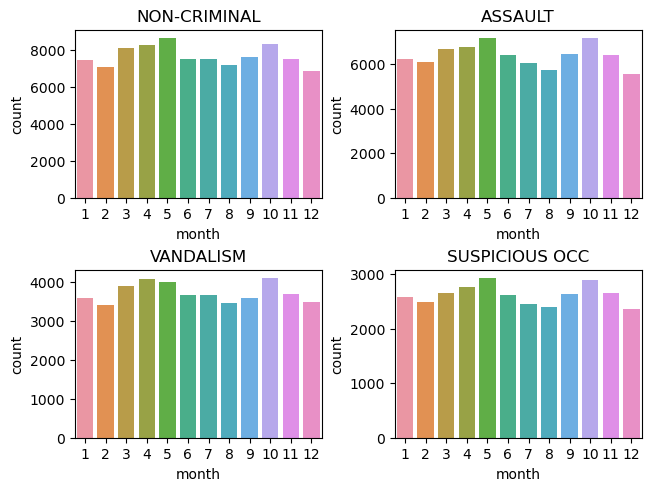

In [195]:
fig, ax = plt.subplots(2,2, constrained_layout=True)
ax = ax.flatten()

for i,cat in enumerate(cat_li):
    data = check[check['Category']==cat][:]
    sns.countplot(data=data, x='month', ax=ax[i])
    ax[i].set_title(cat)
plt.show()

In [43]:
train.duplicated().sum()

2323

In [ ]:
# train.drop_duplicates(inplace=True)
# train.drop(train[(train.Y > 50)].index, inplace=True)
# train.shape